In [56]:
import pandas as pd
import numpy as np

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%pip install opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
root_path = "./trainingSet/trainingSet"

In [5]:
l_dir = os.listdir(root_path)

In [94]:
X = []
y = []


In [95]:
for folder in l_dir : 
    images = os.listdir(root_path+"/"+folder)
    for img_name in images : 
         img =  cv2.imread(root_path+"/"+folder+"/"+img_name,cv2.IMREAD_GRAYSCALE)
         X.append(img)
         y.append(folder)
     

In [96]:
len(X)

42000

In [97]:
ds = pd.read_csv('./charTrainingSet/A_Z Handwritten Data.csv')

In [98]:
ds.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
arr = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [100]:
len(arr)

26

In [101]:
np.max(ds.iloc[:,0])

25

In [102]:
for i,row in ds.iterrows(): 
    img = np.array(row[1:]).reshape([28,28])
    # print(row[1:].shape)
    # print(row[0])
    # plt.imshow(img)
    # plt.show()
    X.append(img)
    y.append(arr[row[0]])

In [ ]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomRotation(0.2),
# ])

In [9]:
# X[0].size
# X[0].ndim
# X[0].shape

(28, 28)

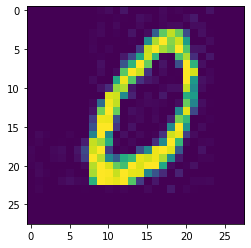

In [10]:
# plt.imshow(X[100])

In [11]:
# print(y[100])

0


In [103]:
from sklearn.utils import shuffle

In [104]:
X,y = shuffle(X, y, random_state = 0)

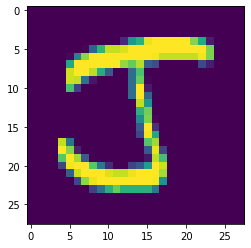

In [105]:
plt.imshow(X[0])

In [106]:
# %pip install tensorflow

In [205]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(arr))
y_enc = label_encoder.transform(y)

In [206]:
from tensorflow.keras.utils import to_categorical
y_enc = to_categorical(y_enc, num_classes=len(np.unique(y_enc)))

In [207]:
y[0]

'J'

In [208]:
label_encoder.inverse_transform([19])

array(['J'], dtype='<U1')

In [209]:
y_enc[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train,X_test, y_train,y_test = train_test_split(X,y_enc,test_size=0.3,random_state=0)

In [212]:
X_train[0].shape

(28, 28)

In [213]:
input_size = 784

In [214]:
# X_train = np.reshape(X_train, [-1, input_size])
X_train = np.array(X_train).astype('float32') / 255
# X_test = np.reshape(X_test, [-1, input_size])
X_test = np.array(X_test).astype('float32') / 255

In [215]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train[0].shape

(28, 28, 1)

In [216]:
X[0].flatten().shape

(784,)

In [217]:
X_train[0].shape

(28, 28, 1)

In [218]:
import tensorflow as tf

In [219]:
batch_size = 128
hidden_units = 256
dropout = 0.70
num_labels = 36

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers

In [221]:
model = Sequential(
    [
        Input(shape=X_train[0].shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [222]:
# %pip install pydot

In [223]:
#plot_model(model, show_shapes=True)

In [224]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [225]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [226]:
model.fit(X_train, y_train,batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
2267/2267 [==============================] - 108s 47ms/step - loss: 0.4481 - accuracy: 0.8749 - val_loss: 0.1315 - val_accuracy: 0.9613
Epoch 2/5
2267/2267 [==============================] - 109s 48ms/step - loss: 0.1899 - accuracy: 0.9455 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 3/5
2267/2267 [==============================] - 110s 49ms/step - loss: 0.1266 - accuracy: 0.9643 - val_loss: 0.0553 - val_accuracy: 0.9849
Epoch 4/5
2267/2267 [==============================] - 115s 51ms/step - loss: 0.0986 - accuracy: 0.9717 - val_loss: 0.0474 - val_accuracy: 0.9871
Epoch 5/5
2267/2267 [==============================] - 114s 50ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0457 - val_accuracy: 0.9878


In [227]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

972/972 [==============================] - 11s 12ms/step - loss: 0.0457 - accuracy: 0.9878


In [228]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [229]:
y_pred[0]

28

In [230]:
y_test = np.argmax(y_test, axis=1)

In [231]:
y_test[0]

28

In [232]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [233]:
label_encoder.inverse_transform(y_pred) 

array(['S', 'O', 'A', ..., '4', 'O', 'C'], dtype='<U1')

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=np.unique(y)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.99      0.99      1380
           2       0.97      0.99      0.98      1200
           3       0.98      0.99      0.99      1298
           4       0.98      0.99      0.98      1202
           5       0.99      0.98      0.99      1112
           6       0.99      0.99      0.99      1187
           7       0.99      0.99      0.99      1351
           8       0.99      0.98      0.98      1246
           9       0.98      0.97      0.98      1295
           A       0.99      0.99      0.99      4248
           B       0.99      0.99      0.99      2595
           C       0.99      0.99      0.99      7003
           D       0.97      0.95      0.96      3037
           E       1.00      0.98      0.99      3465
           F       0.97      0.98      0.98       358
           G       0.98      0.96      0.97      1674
           H       0.97    

In [235]:
test_path = "./testSet/testSet"

In [236]:
test_images=os.listdir(test_path)

In [237]:
test_images[0]

'img_1.jpg'

In [238]:
test_img = cv2.imread(test_path+"/"+test_images[0],cv2.IMREAD_GRAYSCALE)

In [239]:
test_img = test_img/255

In [240]:
test_img = np.expand_dims([test_img],-1)

In [241]:
test_img.shape

(1, 28, 28, 1)

In [242]:
np.argmax(model.predict(test_img))

2

In [243]:
#%pip install tensorflowjs

In [244]:
model.trainable=False

In [246]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model , "E:/Python/FinalYEarProject/pytest/src/assets/")